In [61]:
from math import pi
def var(t0,t):
    Qp = (emissividade * o * AreaHumano * (Thumano**4-t0**4)) * Npessoas
    #Qf =  o * AreaFogo * Tfogo**4
    Qf = 0
    Qq = Qp + Qf
    Qr = (kneve * AinternaIglu *(t0-ta)) / espessura
    dTdt = (1/m0*cneve) * (Qq - Qr)
    return dTdt

def test(t0,t):
    dTdt = espessura * o *(AreaFogo * Tfogo**4 + emissividade * AreaHumano * Thumano**4)/(2*pi*kneve*raio**2)
    return dTdt

In [62]:
from math import pi
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

emissividade = 0.95
o = 5.67 * 10**(-8)
AreaHumano = 2 #m2
Thumano = 273+37 #Kelvin
Npessoas = 2
AreaFogo = 1.256*10**-3
Tfogo = 1672
kneve = 0.3
raio = 2
AinternaIglu = 4*pi*raio**2/2
ta = -43.15 + 273.15
t0 = ta
espessura = 0.33
volume_ar =  33.5103/2
densidade_ar = 1.2922
m0 = densidade_ar * volume_ar
cneve = 2090

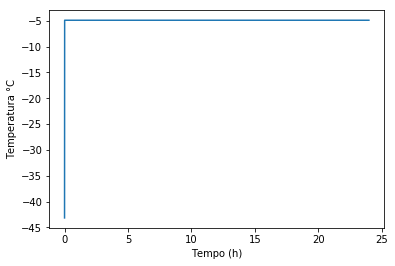

In [63]:
Tmax = 24*60*60
listaTempo = np.arange(0,Tmax,0.1)

solucao = odeint(var,t0,listaTempo)
TempC = [temp-273.15 for temp in solucao[:,0]]
TempoH = [t/3600 for t in listaTempo]
plt.plot(TempoH,TempC)
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura °C')
plt.show()

In [64]:
for e in range(5,50,1):
    dp = e/100
    ap = (4*pi*(2+dp)**2)/2
    solucao = odeint(var,t0,listaTempo)